In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import print_function

import os
import sys
import matplotlib.pyplot as plt

from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model
from keras.datasets import mnist

sys.path.append('..')
from utils import display_examples, RotNetDataGenerator, angle_error, binarize_images

## Load data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Load model

In [4]:
model_location = os.path.join('..', 'models', 'rotnet_mnist.keras')
model = load_model(model_location, custom_objects={'angle_error': angle_error})

## Evaluate model

In [5]:
batch_size = 128
out = model.evaluate(
    RotNetDataGenerator(
        X_test,
        batch_size=batch_size,
        preprocess_func=binarize_images,
        shuffle=True
    ), 
    steps=len(y_test) // batch_size
)

print('Test loss:', out[0])
print('Test angle error:', out[1])

78/78 [==============================] - 3s 10ms/step - loss: 0.7118 - angle_error: 17.4519
Test loss: 0.7118108868598938
Test angle error: 17.451921463012695


## Display examples

1/1 [==============================] - 0s 16ms/step
[19 21 22  3 23 12 16 18  1  9] [19 20 22  7 22 12 15 19  1  9]
[40, 50, 55, -20, 60, 5, 25, 35, -10, -50] [40, 45, 55, -40, 55, 5, 20, 40, -10, -50]


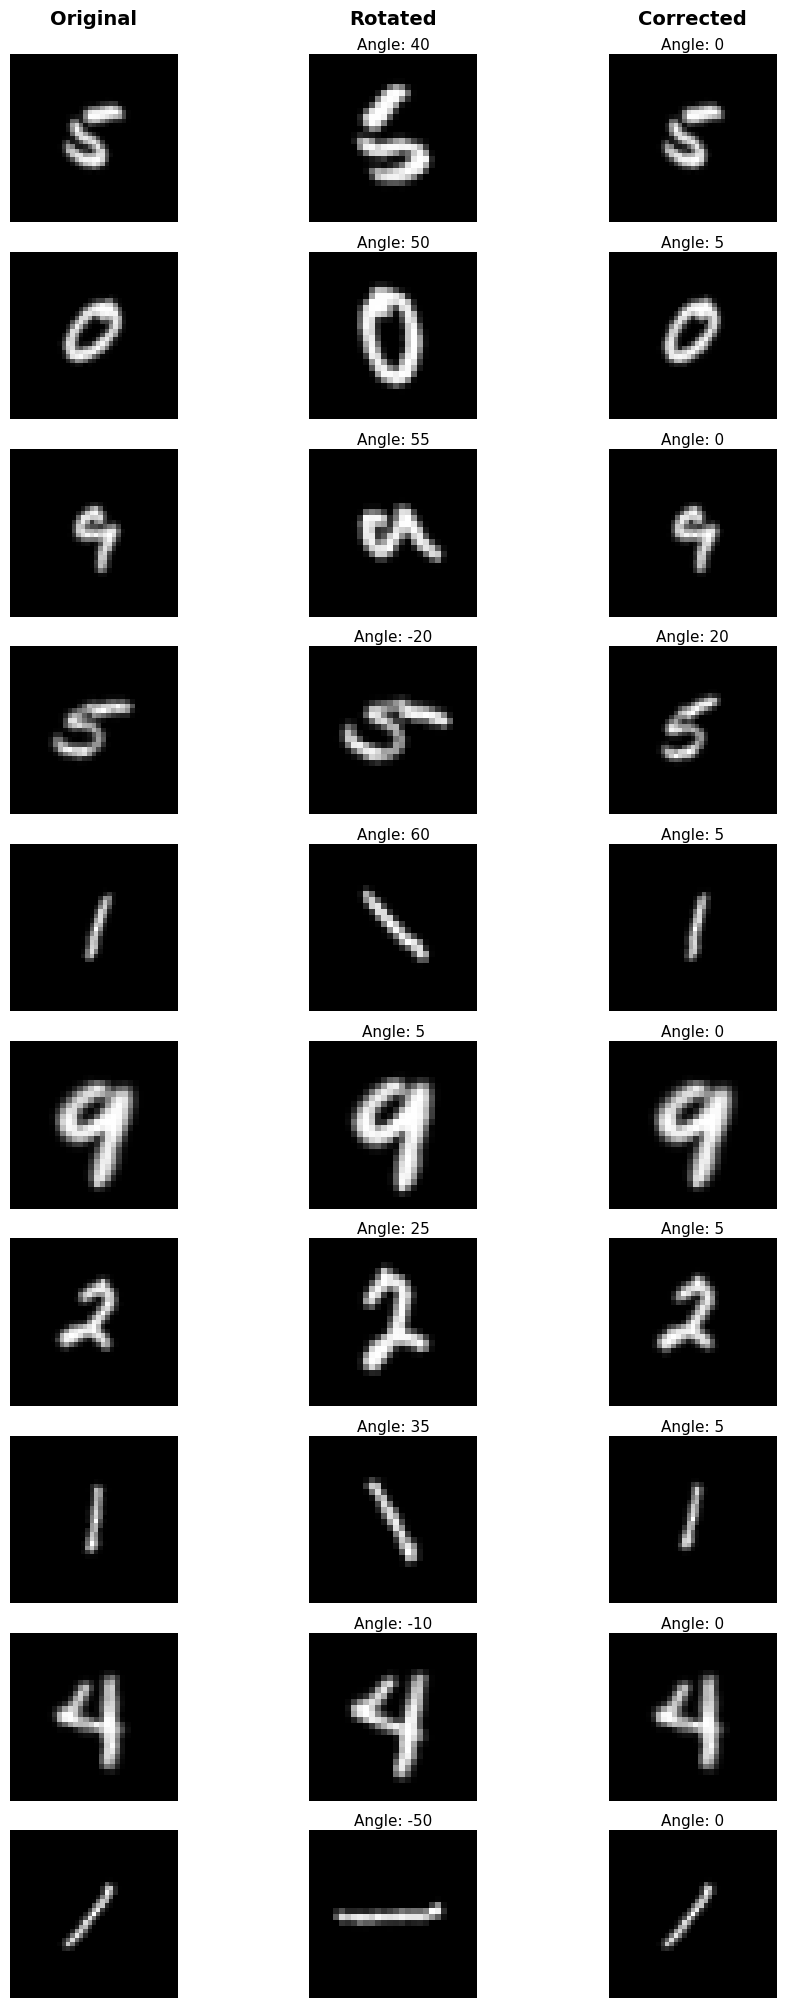

In [7]:
num_images = 10

display_examples(
    model, 
    X_test,
    num_images=num_images,
    preprocess_func=binarize_images,
)